In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

In [3]:
df = pd.read_csv('D:/data/titanic.csv', sep='\t', engine='python')

In [5]:
# df.info, df.columns, heatmap
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
PassengerId    156 non-null int64
Survived       156 non-null int64
Pclass         156 non-null int64
Name           156 non-null object
Sex            156 non-null object
Age            126 non-null float64
SibSp          156 non-null int64
Parch          156 non-null int64
Ticket         156 non-null object
Fare           156 non-null float64
Cabin          31 non-null object
Embarked       155 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 14.7+ KB


In [7]:
df = df.drop(['Name'], axis=1)

In [9]:
df = df.drop(['Ticket'], axis=1)

In [10]:
df = df.drop(['Cabin'], axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
PassengerId    156 non-null int64
Survived       156 non-null int64
Pclass         156 non-null int64
Sex            156 non-null object
Age            126 non-null float64
SibSp          156 non-null int64
Parch          156 non-null int64
Fare           156 non-null float64
Embarked       155 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 11.0+ KB


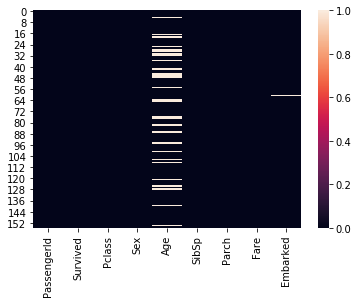

In [12]:
sb.heatmap(df.isnull())

In [13]:
df['Age'] = df['Age'].interpolate()

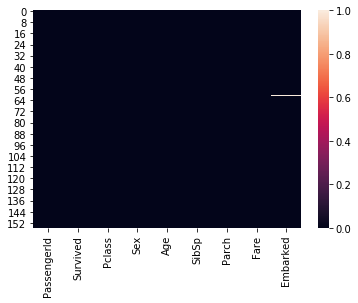

In [14]:
sb.heatmap(df.isnull())

In [15]:
df = df.dropna()

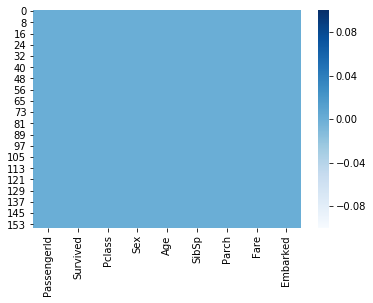

In [17]:
sb.heatmap(df.isnull(), cmap='Blues')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 155
Data columns (total 9 columns):
PassengerId    155 non-null int64
Survived       155 non-null int64
Pclass         155 non-null int64
Sex            155 non-null object
Age            155 non-null float64
SibSp          155 non-null int64
Parch          155 non-null int64
Fare           155 non-null float64
Embarked       155 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 12.1+ KB


In [19]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,44.5,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


In [20]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [21]:
SexDummyColumn = pd.get_dummies(df['Sex'])

In [22]:
SexDummyColumn.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [25]:
df = pd.concat((df, SexDummyColumn), axis=1)

In [26]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male
0,1,0,3,male,22.0,1,0,7.2500,S,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,1,0
2,3,1,3,female,26.0,0,0,7.9250,S,1,0
3,4,1,1,female,35.0,1,0,53.1000,S,1,0
4,5,0,3,male,35.0,0,0,8.0500,S,0,1


In [27]:
df = df.drop(['Sex'], axis=1)

In [28]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
0,1,0,3,22.0,1,0,7.2500,S,0,1
1,2,1,1,38.0,1,0,71.2833,C,1,0
2,3,1,3,26.0,0,0,7.9250,S,1,0
3,4,1,1,35.0,1,0,53.1000,S,1,0
4,5,0,3,35.0,0,0,8.0500,S,0,1


In [29]:
EmbarkedDummyColumn = pd.get_dummies(df['Embarked'])

In [33]:
EmbarkedDummyColumn.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [31]:
df = pd.concat((df, EmbarkedDummyColumn), axis=1)

In [34]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,S,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,C,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,S,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,S,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,S,0,1,0,0,1


In [35]:
df = df.drop(['Embarked'], axis=1)

In [36]:
df = df.drop(['male'], axis = 1)

In [37]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,0,1


In [40]:
df = df.rename(columns={"female":"sex"})

In [41]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,sex,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,0,1


In [42]:
df = df.drop(['C', 'Q'], axis = 1)

In [43]:
df = df.rename(columns ={"S":"Embarked"})

In [44]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,sex,Embarked
0,1,0,3,22.0,1,0,7.2500,0,1
1,2,1,1,38.0,1,0,71.2833,1,0
2,3,1,3,26.0,0,0,7.9250,1,1
3,4,1,1,35.0,1,0,53.1000,1,1
4,5,0,3,35.0,0,0,8.0500,0,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 155
Data columns (total 9 columns):
PassengerId    155 non-null int64
Survived       155 non-null int64
Pclass         155 non-null int64
Age            155 non-null float64
SibSp          155 non-null int64
Parch          155 non-null int64
Fare           155 non-null float64
sex            155 non-null uint8
Embarked       155 non-null uint8
dtypes: float64(2), int64(5), uint8(2)
memory usage: 10.0 KB


In [48]:
X = df.values
y = df['Survived']

In [53]:
X = np.delete(X, 1, axis=1)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [56]:
X_train.shape

(108, 8)

108.5